<a href="https://colab.research.google.com/github/cwpan/flaskwebdoc/blob/main/AllEnergyAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/all_energy_statistics.csv')

In [5]:
df

,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.0,NaN,additives_and_oxygenates
1,Austria,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",17.0,NaN,additives_and_oxygenates
2,Belgium,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
3,Belgium,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
4,Belgium,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",35.0,NaN,additives_and_oxygenates
...,...,...,...,...,...,...,...
1189477,Viet Nam,Electricity - total wind production,2012,"Kilowatt-hours, million",92.0,1.0,wind_electricity
1189478,Viet Nam,Electricity - total wind production,2011,"Kilowatt-hours, million",87.0,NaN,wind_electricity
1189479,Viet Nam,Electricity - total wind production,2010,"Kilowatt-hours, million",50.0,NaN,wind_electricity
1189480,Viet Nam,Electricity - total wind production,2009,"Kilowatt-hours, million",10.0,NaN,wind_electricity


In [6]:
print('COLUMN NAMES:\n'+'-'*16)
for i in df.columns:
    print(i)

COLUMN NAMES:
----------------
country_or_area
commodity_transaction
year
unit
quantity
quantity_footnotes
category


In [7]:
sorted(df['country_or_area'].unique())

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antarctic Fisheries',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia (Plur. State of)',
 'Bonaire, St Eustatius, Saba',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Rep.',
 'Chad',
 'Chile',
 'China',
 'China, Hong Kong SAR',
 'China, Macao SAR',
 'Colombia',
 'Commonwealth of Independent States (CIS)',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curaçao',
 'Cyprus',
 'Czechia',
 'Czechoslovakia (former)',
 "Côte d'Ivoire",
 'Dem. Rep. of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Domin

In [8]:
for i in df.unit.unique():
    print(i)
    print('\n')
    print(df[df['unit']==i]['commodity_transaction'].unique())
    print('\n')

Metric tons,  thousand


['Additives and Oxygenates - Exports' 'Additives and Oxygenates - Imports'
 'Additives and Oxygenates - Production' ...
 'White spirit and special boiling point industrial spirits - Transfers and recycled products'
 'White spirit and special boiling point industrial spirits - Transformation'
 'White spirit and special boiling point industrial spirits - Transformation in petrochemical plants']


Terajoules


['Animal waste - Consumption by commerce and public services'
 'Animal waste - Consumption by food and tobacco '
 'Animal waste - Consumption by households'
 'Animal waste - Consumption by manufacturing, construction and non-fuel industry'
 'Animal waste - Consumption by non-metallic minerals '
 'Animal waste - Consumption by other'
 'Animal waste - Consumption by other manuf., const. and non-fuel min. ind.'
 'Animal waste - Consumption in agriculture, forestry and fishing'
 'Animal waste - Consumption not elsewhere specified (industry)'
 'Animal waste - Con

In [9]:
df

,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.0,NaN,additives_and_oxygenates
1,Austria,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",17.0,NaN,additives_and_oxygenates
2,Belgium,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
3,Belgium,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
4,Belgium,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",35.0,NaN,additives_and_oxygenates
...,...,...,...,...,...,...,...
1189477,Viet Nam,Electricity - total wind production,2012,"Kilowatt-hours, million",92.0,1.0,wind_electricity
1189478,Viet Nam,Electricity - total wind production,2011,"Kilowatt-hours, million",87.0,NaN,wind_electricity
1189479,Viet Nam,Electricity - total wind production,2010,"Kilowatt-hours, million",50.0,NaN,wind_electricity
1189480,Viet Nam,Electricity - total wind production,2009,"Kilowatt-hours, million",10.0,NaN,wind_electricity


In [10]:
# Find  the shape, features and unique values
print("Number of rows and columns are:", df.shape)
print("List of countries and Area are: {}".format(df.country_or_area.unique()))

Number of rows and columns are: (1189482, 7)
List of countries and Area are: ['Austria' 'Belgium' 'Czechia' 'Finland' 'France' 'Greece' 'Hungary'
 'Italy' 'Korea, Republic of' 'Netherlands' 'Romania' 'Serbia' 'Slovakia'
 'Ukraine' 'United Kingdom' 'United States' 'Brunei Darussalam' 'Bulgaria'
 'Canada' 'Chile' 'Croatia' 'Iran (Islamic Rep. of)' 'Jordan' 'Lithuania'
 'Mexico' 'Oman' 'Other Asia' 'Poland' 'Portugal' 'Spain' 'Sweden'
 'Switzerland' 'T.F.Yug.Rep. Macedonia' 'Turkey' 'Uzbekistan' 'Argentina'
 'Colombia' 'Germany' 'Norway' 'Australia' 'China, Macao SAR' 'Japan'
 'Denmark' 'Ireland' 'Philippines' 'Bangladesh' 'Eritrea' 'Ethiopia'
 'Lesotho' 'Nepal' 'Niger' 'Pakistan' 'Serbia and Montenegro' 'Tunisia'
 'Botswana' 'Georgia' 'Republic of Moldova' 'Peru' 'South Africa'
 'Iceland' 'Latvia' 'Luxembourg' 'Cuba' 'Kyrgyzstan' 'Singapore'
 'Thailand' 'United Arab Emirates' 'Uruguay' 'Armenia' 'Fiji'
 "Korea, Dem.Ppl's.Rep." 'Russian Federation' 'Swaziland' 'Zimbabwe'
 'Afghanistan' 'A

In [11]:
# To find details about the data from the imported file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1189482 entries, 0 to 1189481
Data columns (total 7 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   country_or_area        1189482 non-null  object 
 1   commodity_transaction  1189482 non-null  object 
 2   year                   1189482 non-null  int64  
 3   unit                   1189482 non-null  object 
 4   quantity               1189482 non-null  float64
 5   quantity_footnotes     163946 non-null   float64
 6   category               1189482 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 63.5+ MB


In [12]:
#To check for the unique values for 'country_or_area' column
len(df['country_or_area'].unique())

243

In [13]:
#To check for the unique values for 'year' column
len(df['year'].unique())

25

In [14]:
#checking for the unique values for 'category' column
len(df['category'].unique())

71

In [15]:
# To find the missing values
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['Count', '%']
missing.sort_values(by='Count', ascending=False)

,Count,%
quantity_footnotes,1025536,86.217026
country_or_area,0,0.000000
commodity_transaction,0,0.000000
year,0,0.000000
unit,0,0.000000
quantity,0,0.000000
category,0,0.000000


In [16]:
# Since quantity_footnotes is missing lots of value, drop it from the analysis
df1 = df.drop(['quantity_footnotes'], axis=1)
df1.columns

Index(['country_or_area', 'commodity_transaction', 'year', 'unit', 'quantity',
       'category'],
      dtype='object')

In [17]:
# To convert all the names in this & other column to lower case
df1['country_or_area'] = df1['country_or_area'].str.lower()
df1['commodity_transaction'] = df1['commodity_transaction'].str.lower()
df1['unit'] = df1['unit'].str.lower()
df1['category'] = df1['category'].str.lower()
df1.head()

,country_or_area,commodity_transaction,year,unit,quantity,category
0,austria,additives and oxygenates - exports,1996,"metric tons, thousand",5.0,additives_and_oxygenates
1,austria,additives and oxygenates - exports,1995,"metric tons, thousand",17.0,additives_and_oxygenates
2,belgium,additives and oxygenates - exports,2014,"metric tons, thousand",0.0,additives_and_oxygenates
3,belgium,additives and oxygenates - exports,2013,"metric tons, thousand",0.0,additives_and_oxygenates
4,belgium,additives and oxygenates - exports,2012,"metric tons, thousand",35.0,additives_and_oxygenates


In [18]:
# Simplifying the column names by renaming it
df1.columns = ['country', 'commodity', 'year', 'unit', 'quantity', 'category']
df1.head()

,country,commodity,year,unit,quantity,category
0,austria,additives and oxygenates - exports,1996,"metric tons, thousand",5.0,additives_and_oxygenates
1,austria,additives and oxygenates - exports,1995,"metric tons, thousand",17.0,additives_and_oxygenates
2,belgium,additives and oxygenates - exports,2014,"metric tons, thousand",0.0,additives_and_oxygenates
3,belgium,additives and oxygenates - exports,2013,"metric tons, thousand",0.0,additives_and_oxygenates
4,belgium,additives and oxygenates - exports,2012,"metric tons, thousand",35.0,additives_and_oxygenates


In [19]:
# To explore the category
df1['category'].unique()

array(['additives_and_oxygenates', 'animal_waste', 'anthracite',
       'aviation_gasoline', 'bagasse', 'biodiesel', 'biogases',
       'biogasoline', 'bitumen', 'black_liquor', 'blast_furnace_gas',
       'brown_coal_briquettes', 'brown_coal', 'charcoal', 'coal_tar',
       'coke_oven_coke', 'coking_coal', 'conventional_crude_oil',
       'direct_use_of_geothermal_heat',
       'direct_use_of_solar_thermal_heat',
       'electricity_net_installed_capacity_of_electric_power_plants',
       'ethane', 'falling_water', 'fuel_oil', 'fuelwood', 'gas_coke',
       'gas_oil_diesel_oil', 'gasoline_type_jet_fuel', 'gasworks_gas',
       'geothermal', 'hard_coal', 'heat', 'hydro', 'industrial_waste',
       'kerosene_type_jet_fuel', 'lignite', 'liquified_petroleum_gas',
       'lubricants', 'motor_gasoline', 'municipal_wastes', 'naphtha',
       'natural_gas_including_lng', 'natural_gas_liquids',
       'nuclear_electricity', 'of_which_biodiesel',
       'of_which_biogasoline', 'oil_shale_oil_sa

In [20]:
# To explore more about the commodity
df1['commodity'].unique()

array(['additives and oxygenates - exports',
       'additives and oxygenates - imports',
       'additives and oxygenates - production', ...,
       'white spirit and special boiling point industrial spirits - transformation',
       'white spirit and special boiling point industrial spirits - transformation in petrochemical plants',
       'electricity - total wind production'], dtype=object)

In [21]:
# To create a function to select a country to achieve this goal.
def select_country(countryname):
    country_data = df1[df1.country.isin(countryname)].sort_values('year').reset_index()
    country_data.drop('index', axis=1, inplace=True)
    return country_data

In [22]:
# To create the category by creating a function
def select_category(country_data, categoryname):
    category_country = country_data[country_data.category.isin(categoryname)].sort_values('year').reset_index()
    category_country.drop('index', axis=1, inplace=True)
    return category_country

In [23]:
# To filter further for the commodity type
def select_commodity(category_country, commodityname):
    commodity_country = category_country[category_country.commodity.isin(commodityname)].sort_values('year').reset_index()
    commodity_country.drop('index', axis=1, inplace=True )
    return commodity_country

In [24]:
# Generating data for USA

us_data = select_country(['united states'])

In [25]:
# Generating category for the conventional crude oil
crude_us = select_category(us_data, ['conventional_crude_oil'])

In [26]:
coal_us = select_category(us_data, ['brown_coal'])
coal_us

,country,commodity,year,unit,quantity,category
0,united states,"brown coal - consumption by paper, pulp and print",1990,"metric tons, thousand",7.000000e+02,brown_coal
1,united states,brown coal - final consumption,1990,"metric tons, thousand",9.551000e+03,brown_coal
2,united states,brown coal - final energy consumption,1990,"metric tons, thousand",9.551000e+03,brown_coal
3,united states,brown coal - production,1990,"metric tons, thousand",3.015190e+05,brown_coal
4,united states,brown coal - total energy supply,1990,"metric tons, thousand",3.057080e+05,brown_coal
...,...,...,...,...,...,...
667,united states,brown coal - consumption by commerce and publi...,2014,"metric tons, thousand",5.240000e+02,brown_coal
668,united states,brown coal - changes in stocks,2014,"metric tons, thousand",-7.719000e+03,brown_coal
669,united states,lignite brown coal - total resources in place,2014,"metric tons, thousand",1.398360e+09,brown_coal
670,united states,brown coal - exports,2014,"metric tons, thousand",5.887000e+03,brown_coal


In [27]:
# To filter data for the conventional crude oil production for USA

crudeprod_us = select_commodity(crude_us,['conventional crude oil - production'])

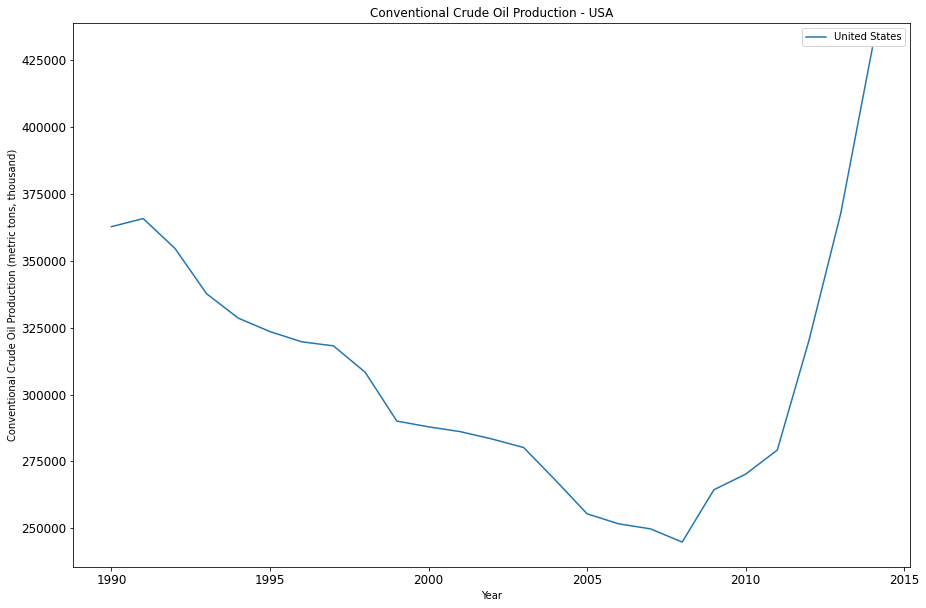

In [28]:
# To plot line graph for  the Conventional Crude Production - USA

plt.figure(figsize=(15, 10))
x1 = crudeprod_us.year
y1 = crudeprod_us.quantity
plt.plot(x1, y1, label='United States')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Year")
plt.ylabel("Conventional Crude Oil Production (metric tons, thousand)")
plt.title("Conventional Crude Oil Production - USA")
plt.legend(loc='best')
plt.show()

In [29]:
# To filter data for the conventional crude oil Imports for USA

crudeimp_us = select_commodity(crude_us,['conventional crude oil - imports'])

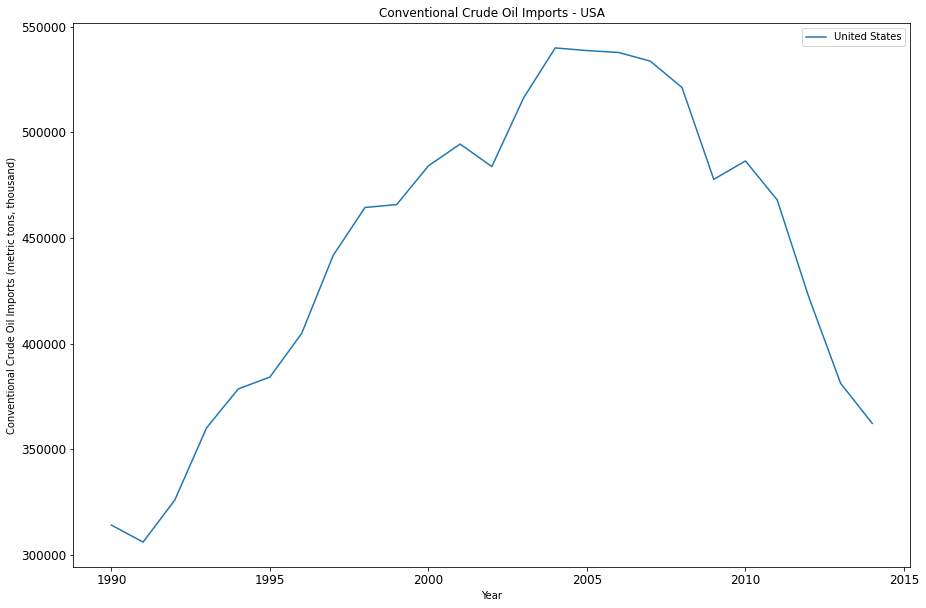

In [30]:
# plotting line graph for USA -  the Conventional Crude Imports

plt.figure(figsize=(15, 10))
x1 = crudeimp_us.year
y1 = crudeimp_us.quantity
plt.plot(x1, y1, label='United States')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Year")
plt.ylabel("Conventional Crude Oil Imports (metric tons, thousand)")
plt.title("Conventional Crude Oil Imports - USA")
plt.legend(loc='best')
plt.show()

In [31]:
coalconsumption_us = select_commodity(coal_us, ['brown coal - final energy consumption'])
coalconsumption_us

,country,commodity,year,unit,quantity,category
0,united states,brown coal - final energy consumption,1990,"metric tons, thousand",9551.0,brown_coal
1,united states,brown coal - final energy consumption,1991,"metric tons, thousand",10058.0,brown_coal
2,united states,brown coal - final energy consumption,1992,"metric tons, thousand",6882.0,brown_coal
3,united states,brown coal - final energy consumption,1993,"metric tons, thousand",7703.0,brown_coal
4,united states,brown coal - final energy consumption,1994,"metric tons, thousand",7056.0,brown_coal
5,united states,brown coal - final energy consumption,1995,"metric tons, thousand",7119.0,brown_coal
6,united states,brown coal - final energy consumption,1996,"metric tons, thousand",7151.0,brown_coal
7,united states,brown coal - final energy consumption,1997,"metric tons, thousand",7013.0,brown_coal
8,united states,brown coal - final energy consumption,1998,"metric tons, thousand",6927.0,brown_coal
9,united states,brown coal - final energy consumption,1999,"metric tons, thousand",6859.0,brown_coal


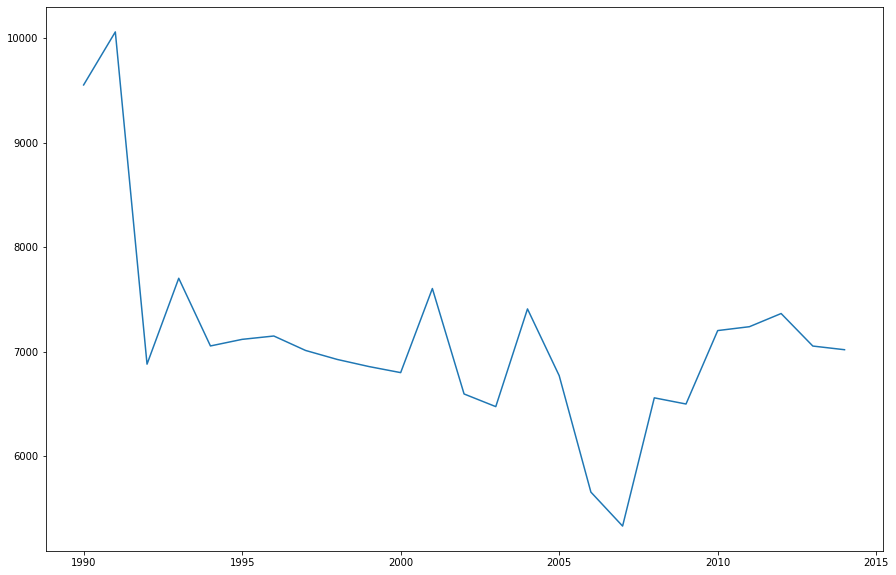

In [32]:
# plotting line graph for Coal consumption - USA

plt.figure(figsize=(15, 10))
x1 = coalconsumption_us.year
y1 = coalconsumption_us.quantity
plt.plot(x1, y1, label='United States')

In [33]:
coalconsumption_us = select_commodity(coal_us, ['brown coal - final energy consumption'])
coalconsumption_us

,country,commodity,year,unit,quantity,category
0,united states,brown coal - final energy consumption,1990,"metric tons, thousand",9551.0,brown_coal
1,united states,brown coal - final energy consumption,1991,"metric tons, thousand",10058.0,brown_coal
2,united states,brown coal - final energy consumption,1992,"metric tons, thousand",6882.0,brown_coal
3,united states,brown coal - final energy consumption,1993,"metric tons, thousand",7703.0,brown_coal
4,united states,brown coal - final energy consumption,1994,"metric tons, thousand",7056.0,brown_coal
5,united states,brown coal - final energy consumption,1995,"metric tons, thousand",7119.0,brown_coal
6,united states,brown coal - final energy consumption,1996,"metric tons, thousand",7151.0,brown_coal
7,united states,brown coal - final energy consumption,1997,"metric tons, thousand",7013.0,brown_coal
8,united states,brown coal - final energy consumption,1998,"metric tons, thousand",6927.0,brown_coal
9,united states,brown coal - final energy consumption,1999,"metric tons, thousand",6859.0,brown_coal


In [34]:
df1[df1.category.isin(['natural_gas_including_lng','natural_gas_liquids'])]

,country,commodity,year,unit,quantity,category
782190,albania,natural gas (including lng) - consumption by c...,1996,terajoules,323.0,natural_gas_including_lng
782191,albania,natural gas (including lng) - consumption by c...,1995,terajoules,389.0,natural_gas_including_lng
782192,albania,natural gas (including lng) - consumption by c...,1994,terajoules,450.0,natural_gas_including_lng
782193,albania,natural gas (including lng) - consumption by c...,1993,terajoules,500.0,natural_gas_including_lng
782194,albania,natural gas (including lng) - consumption by c...,1992,terajoules,600.0,natural_gas_including_lng
...,...,...,...,...,...,...
854925,netherlands,natural gas liquids - transformation in petroc...,1999,"metric tons, thousand",1508.0,natural_gas_liquids
854926,netherlands,natural gas liquids - transformation in petroc...,1998,"metric tons, thousand",1362.0,natural_gas_liquids
854927,netherlands,natural gas liquids - transformation in petroc...,1997,"metric tons, thousand",1333.0,natural_gas_liquids
854928,netherlands,natural gas liquids - transformation in petroc...,1996,"metric tons, thousand",1259.0,natural_gas_liquids


In [35]:
gas_us = select_category(us_data, ['natural_gas_including_lng'])
gas_us

,country,commodity,year,unit,quantity,category
0,united states,natural gas (including lng) - transformation i...,1990,terajoules,3039619.0,natural_gas_including_lng
1,united states,natural gas (including lng) - own use by oil a...,1990,terajoules,1343653.0,natural_gas_including_lng
2,united states,natural gas (including lng) - consumption by h...,1990,terajoules,4772284.0,natural_gas_including_lng
3,united states,natural gas (including lng) - consumption by m...,1990,terajoules,5113334.0,natural_gas_including_lng
4,united states,natural gas (including lng) - consumption by o...,1990,terajoules,7622534.0,natural_gas_including_lng
...,...,...,...,...,...,...
1072,united states,natural gas (including lng) - consumption by p...,2014,terajoules,910025.0,natural_gas_including_lng
1073,united states,natural gas (including lng) - consumption by t...,2014,terajoules,45852.0,natural_gas_including_lng
1074,united states,natural gas (including lng) - consumption by t...,2014,terajoules,948328.0,natural_gas_including_lng
1075,united states,natural gas (including lng) - production,2014,terajoules,28026934.0,natural_gas_including_lng


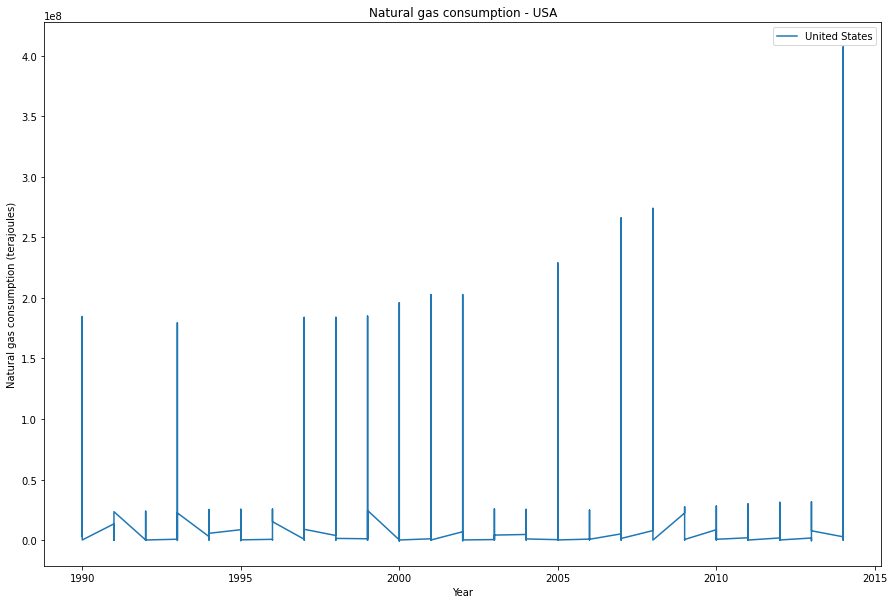

In [36]:
# plotting line graph for USA -  Natural gas consumption

plt.figure(figsize=(15, 10))
x1 = gas_us.year
y1 = gas_us.quantity
plt.plot(x1, y1, label='United States')
plt.xlabel("Year")
plt.ylabel("Natural gas consumption (terajoules)")
plt.title("Natural gas consumption - USA")
plt.legend(loc='best')
plt.show()

In [37]:
# The Solar Electricity Consumption - USA

solar_us = select_category(us_data, ['solar_electricity'])

In [38]:
# To filter data for the Solar Electricity Production - USA

solarcap_us = select_commodity(solar_us,['electricity - total solar production'])

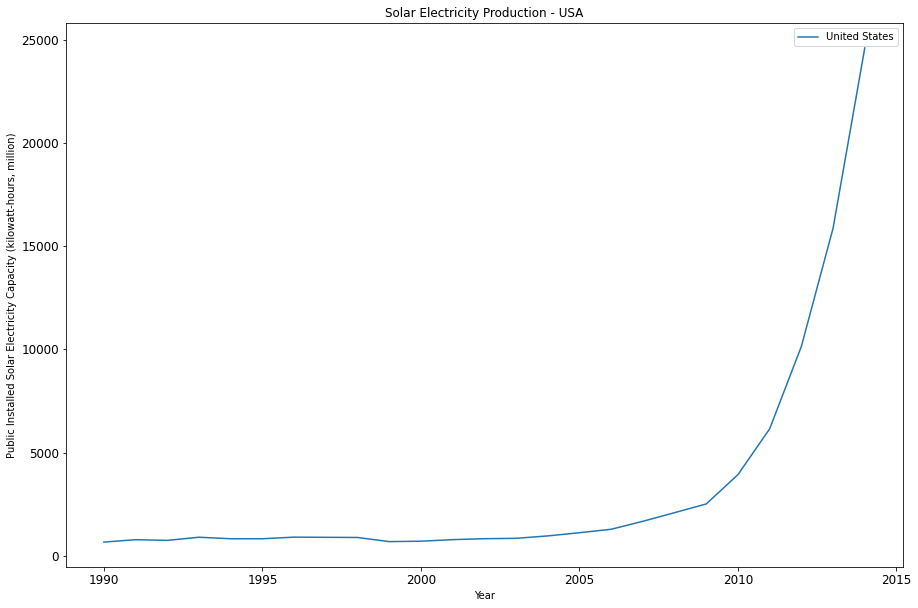

In [39]:
# To plot line graph for the Solar Electricity Production - USA

plt.figure(figsize=(15, 10))
x1 = solarcap_us.year
y1 = solarcap_us.quantity
plt.plot(x1, y1, label='United States')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Year")
plt.ylabel("Public Installed Solar Electricity Capacity (kilowatt-hours, million)")
plt.title("Solar Electricity Production - USA")
plt.legend(loc='best')
plt.show()

In [40]:
# The Wind Electricity category - USA

wind_us = select_category(us_data, ['wind_electricity'])

In [41]:
# The Wind Electricity Production- USA

windcap_us = select_commodity(wind_us,['electricity - total wind production'])

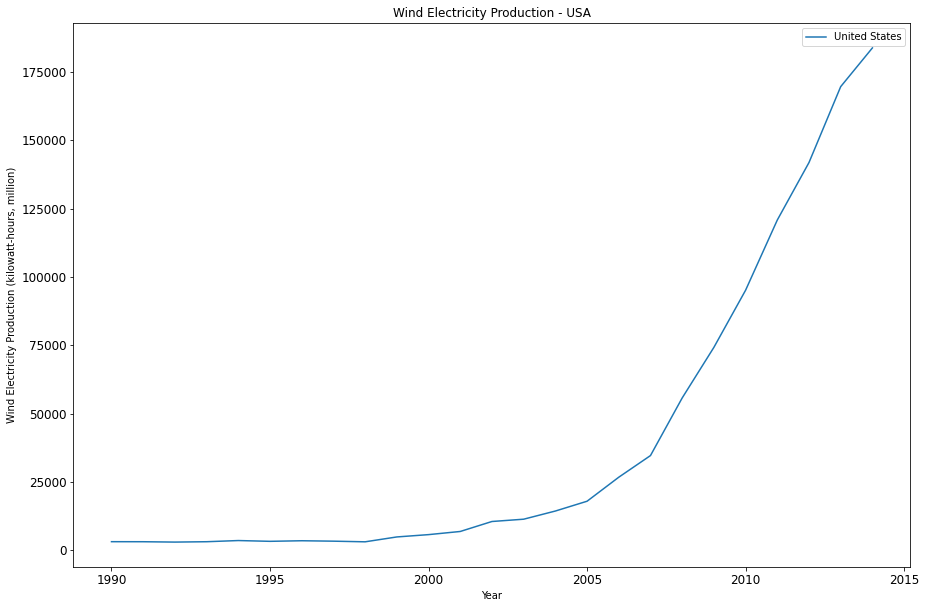

In [42]:
# To plot the line graph for the Wind Electricity Production - USA

plt.figure(figsize=(15, 10))
x1 = windcap_us.year
y1 = windcap_us.quantity
plt.plot(x1, y1, label='United States')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Year")
plt.ylabel("Wind Electricity Production (kilowatt-hours, million)")
plt.title("Wind Electricity Production - USA")
plt.legend(loc='best')
plt.show()

In [43]:
#Todo - Nuclear energy - USA

In [44]:
# The Nuclear Electricity category - USA
nuclear_us = select_category(us_data, ['nuclear_electricity'])

In [45]:
# The Total Nuclear Electricity Production- USA

nuclearcap_us = select_commodity(nuclear_us,['electricity - total nuclear production'])

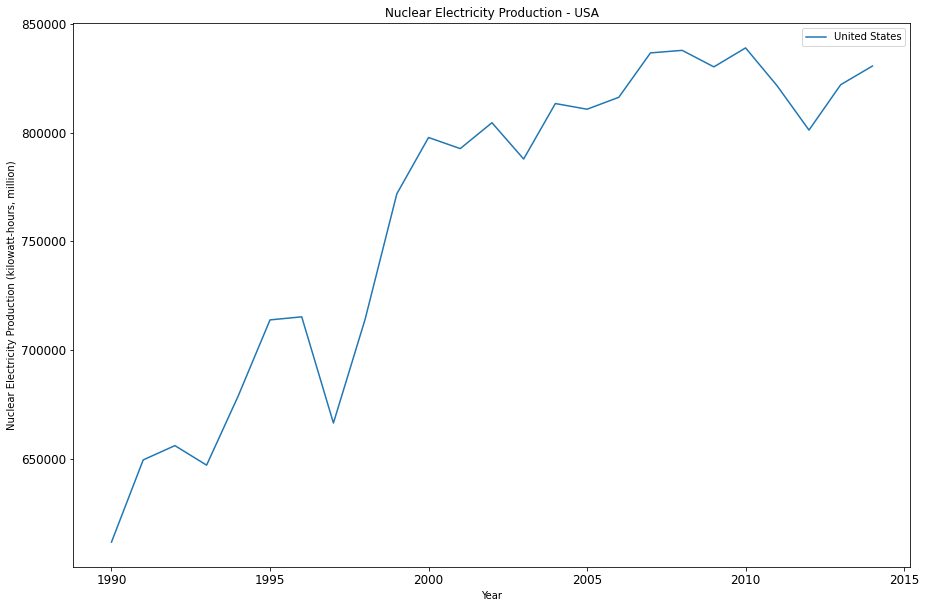

In [46]:
# To plot the line graph for the Nuclear Electricity Production - USA

plt.figure(figsize=(15, 10))
x1 = nuclearcap_us.year
y1 = nuclearcap_us.quantity
plt.plot(x1, y1, label='United States')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Year")
plt.ylabel("Nuclear Electricity Production (kilowatt-hours, million)")
plt.title("Nuclear Electricity Production - USA")
plt.legend(loc='best')
plt.show()

In [47]:
#ToDo - Hydro energy - USA
# The Hydro Electricity category - USA
hydro_us = select_category(us_data, ['hydro'])

In [48]:
# The Total Hydro Electricity Production- USA

hydrocap_us = select_commodity(hydro_us,['electricity - total hydro production'])

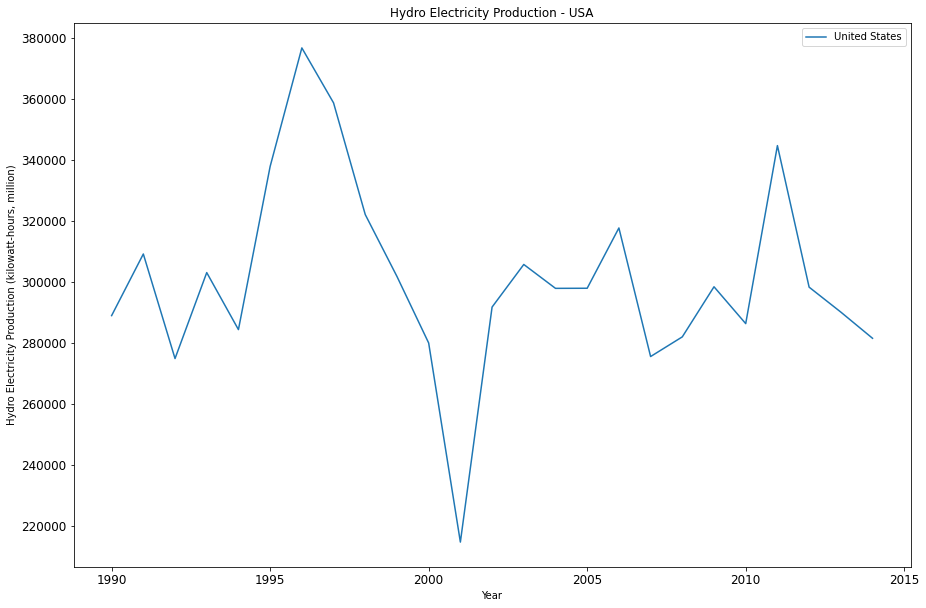

In [49]:
# To plot the line graph for the Hydro Electricity Production - USA

plt.figure(figsize=(15, 10))
x1 = hydrocap_us.year
y1 = hydrocap_us.quantity
plt.plot(x1, y1, label='United States')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Year")
plt.ylabel("Hydro Electricity Production (kilowatt-hours, million)")
plt.title("Hydro Electricity Production - USA")
plt.legend(loc='best')
plt.show()